2024-07-12 13:08:05.278348: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 13:08:05.538427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 13:08:15.685219: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-12 13:08:15.709178: I tens

Epoch 1/50


2024-07-12 13:08:16.945995: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f5e644ad0e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-12 13:08:16.946049: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-07-12 13:08:16.962940: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-12 13:08:17.000928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-07-12 13:08:17.193534: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 [==============================] - 2s 4ms/step - loss: 6.6203 - val_loss: 2.0297
Epoch 2/50
157/157 [==============================] - 0s 3ms/step - loss: 1.9262 - val_loss: 1.9185
Epoch 3/50
157/157 [==============================] - 1s 3ms/step - loss: 1.8152 - val_loss: 1.7593
Epoch 4/50
157/157 [==============================] - 1s 3ms/step - loss: 1.7744 - val_loss: 1.7836
Epoch 5/50
157/157 [==============================] - 1s 3ms/step - loss: 1.7594 - val_loss: 1.9258
Epoch 6/50
157/157 [==============================] - 0s 3ms/step - loss: 1.7805 - val_loss: 1.7311
Epoch 7/50
157/157 [==============================] - 1s 3ms/step - loss: 1.7463 - val_loss: 2.0134
Epoch 8/50
157/157 [==============================] - 1s 3ms/step - loss: 1.7318 - val_loss: 1.9197
Epoch 9/50
157/157 [==============================] - 0s 3ms/step - loss: 1.7402 - val_loss: 1.7508
Epoch 10/50
157/157 [==============================] - 1s 3ms/step - loss: 1.7474 - val_loss: 1.7654
Epoch 11/5

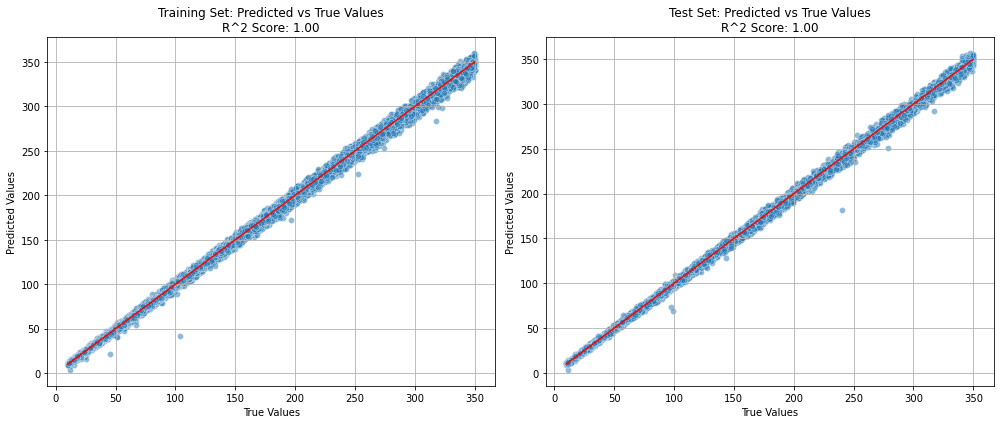

18697/18697 [==============================] - 25s 1ms/step


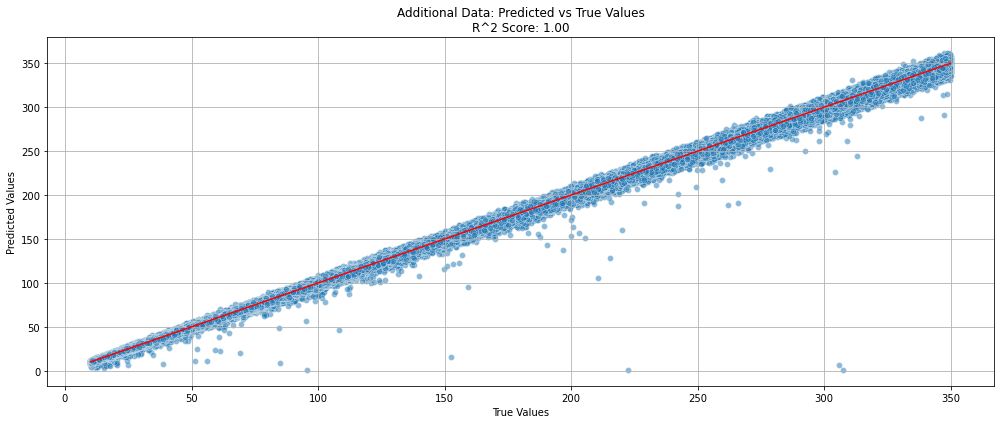

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv('hgcal_electron_data_50000.csv')

# Define features for training
features_train = [f'energySum_layer{i}' for i in range(28)]
features_train.append('target_energy')

# Prepare training data
df_train = df[features_train].drop('target_energy', axis=1)
X = df_train.values
y = df['target_energy'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=256, epochs=50)

# Make predictions
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Evaluate model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Plot results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5)
sns.lineplot(x=y_train, y=y_train, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Training Set: Predicted vs True Values\nR^2 Score: {train_r2:.2f}')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Test Set: Predicted vs True Values\nR^2 Score: {test_r2:.2f}')
plt.grid(True)

plt.tight_layout()
#plt.savefig('DNN_pred_50K.png')
#plt.savefig('DNN_pred_50K.pdf')
plt.show()

# Load additional data for prediction
df1 = pd.read_csv('hgcal_electron_data.csv').iloc[50000:]
df1_full = df1[features_train[:-1]]  # Exclude target_energy
X1 = df1_full.values
y_pred_test1 = model.predict(X1).flatten()

# Plot predictions for additional data
test_r2_1 = r2_score(df1['target_energy'], y_pred_test1)

plt.figure(figsize=(14, 6))
sns.scatterplot(x=df1['target_energy'], y=y_pred_test1, alpha=0.5)
sns.lineplot(x=df1['target_energy'], y=df1['target_energy'], color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Additional Data: Predicted vs True Values\nR^2 Score: {test_r2_1:.2f}')
plt.grid(True)
plt.tight_layout()

#plt.savefig('DNN_pred_additional.png')
#plt.savefig('DNN_pred_additional.pdf')
plt.show()
